In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#load data 
dataset= pd.read_csv('diabetes(1).csv')

X = dataset.iloc[:, 0:8].values
y = dataset.iloc[:, 8].values

#splitting the Dataset into Trainingset and Testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#the training Dataset is 20% of the whole Dataset

In [5]:
#feature Scaling of the Dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components =2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [6]:
# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [23]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('the accuracy is ' ,int(accuracy_score(y_test, y_pred)* 100) ,'%')

[[96 11]
 [22 25]]
the accuracy is  78 %


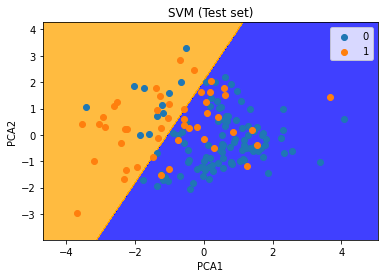

In [8]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set =X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75,cmap = ListedColormap(('blue', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],cmap = ListedColormap(('blue', 'orange'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

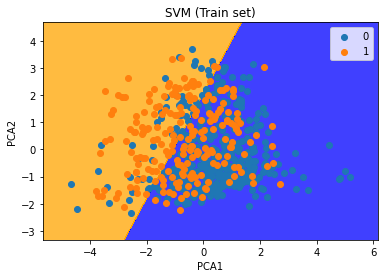

In [9]:
# Visualising the Train set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],cmap = ListedColormap(('blue', 'orange')), label = j)
plt.title('SVM (Train set)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

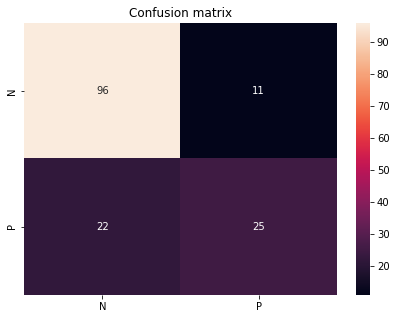

In [15]:
#confusion matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = classifier.predict(X_test))

#printing the confusion matrix
df_cm = pd.DataFrame(confusion, index = [i for i in "NP"],columns = [i for i in "NP"])
plt.figure(figsize = (7,5))
plt.title("Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt='d')
plt.show()

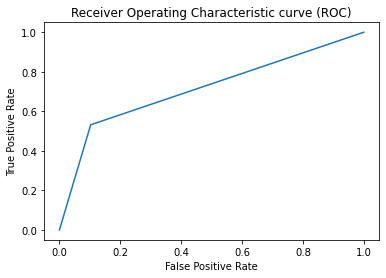

In [16]:
#roc curve
from sklearn.metrics import roc_curve , auc  
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, classifier.predict(X_test))
    roc_auc[i] = auc(fpr[i], tpr[i])

#printing the Receiver operating characteristic curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, classifier.predict(X_test))
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve (ROC)')
plt.show()